<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-149/blob/main/TecMty_Regresion_lineal_polinomial_A01793468_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
#Importación de librerías
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from numpy import arange
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn import metrics
from sklearn.metrics import r2_score

# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

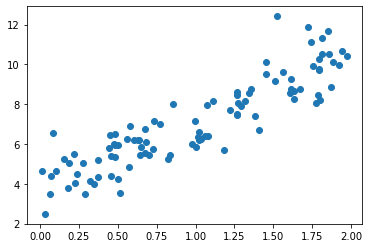

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

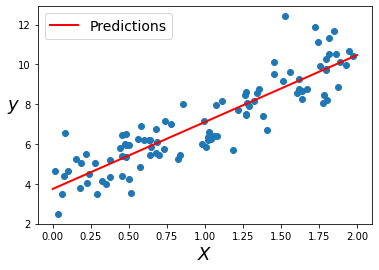

In [ ]:
#X_fit[]
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

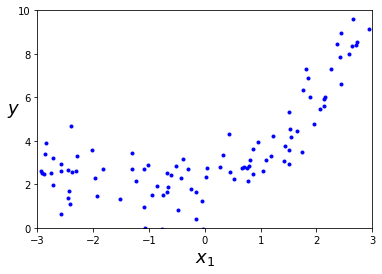

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

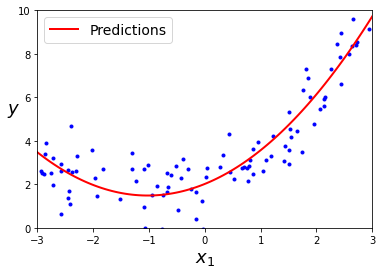

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

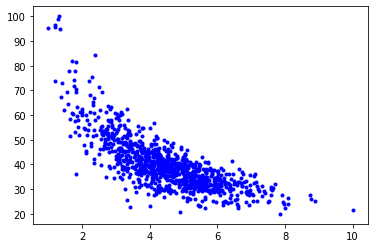

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Numero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Numero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


## REGRESIÓN LINEAL

In [ ]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
yhatLR = linear_reg.predict(X_test)

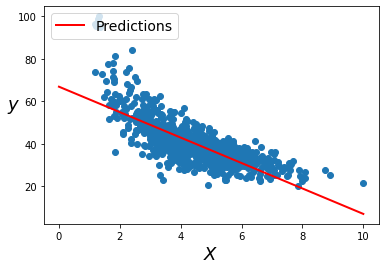

In [ ]:
# Construimos la mejor linea de ajuste
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Las predicciones no tienen un buen ajuste, considerando que estamos aplicando una regresión lineal a datos con comportamiento polinomial

In [ ]:
print("Model slope:    ", linear_reg.coef_[0])
print("Model intercept:", linear_reg.intercept_)

Model slope:     -5.988826991706113
Model intercept: 66.83650741226988


Modelo estimado con regresión lineal:

y^=66.84X - 5.99

In [ ]:
#Calculo de MAE, RSME y R2
print("REGESION LINEAL")
print("*****"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhatLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhatLR)))
print('R2_score:',r2_score(y_test, yhatLR))
print("*****"*10)


REGESION LINEAL
**************************************************
Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
R2_score: 0.6116251549562579
**************************************************


## REGRESIÓN POLINOMIAL

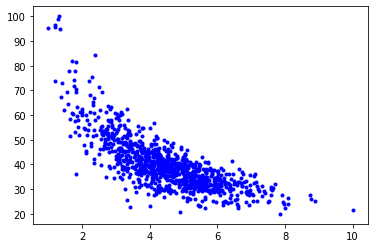

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
pd.DataFrame(y)

,Manufacturing Cost
0,95.066056
1,96.531750
2,73.661311
3,95.566843
4,98.777013
...,...
995,23.855067
996,27.536542
997,25.973787
998,25.138311


In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_poly

array([[ 7.97424764, 63.58862541],
       [ 1.89573077,  3.59379517],
       [ 3.5765014 , 12.79136229],
       ...,
       [ 3.94046305, 15.52724904],
       [ 4.52448429, 20.4709581 ],
       [ 5.86814353, 34.43510849]])

In [ ]:
X_poly[0]

array([ 7.97424764, 63.58862541])

In [ ]:
#Ajustamos el modelo con set de pruebas extendido
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

Modelo estimado con regresión polinomial:

$\hat{y} =  -16.41X +1.13X^2 + 88.80$

In [ ]:
yhatPR = linear_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


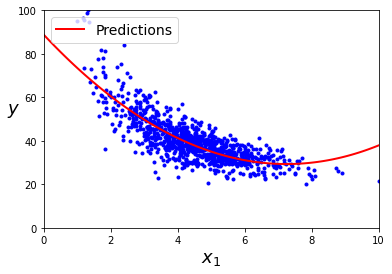

In [ ]:
#Graficamos los datos

X_new=pd.DataFrame(np.linspace(0, 10, 100).reshape(100, 1), columns = ['Number of Units'])
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

Con la regresión polinomial, como se aprecia en el gráfico, el modelo es mucho mas adecuado para reflejar el comportamiento del costo unitario de las partes en función del número de unidades producidas

In [ ]:
#Calculo de MAE, RSME y R2
print("REGRESION POLINOMIAL")
print("*****"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhatLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhatLR)))
print('R2_score:',r2_score(y_test, yhatLR))
print("*****"*10)

REGESION POLINOMIAL
**************************************************
Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
R2_score: 0.6116251549562579
**************************************************


LASSO Y RIDGE Y UNIFICACIÓN DE LOS 4 METODOS PARA ANALSIs

In [ ]:
#The Pipeline is built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step and value is an estimator object

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

In [ ]:
# Definamos 4 modelos: el de regresión lineal múltiple (RLM); de RLM con 
# regularización L1 (lasso); de RLM con regularización L2 (ridge) y
# RLM con regularización conjunta L1 y L2 (elastic-net):  

modelos = []
modelos.append(('LR', LinearRegression(fit_intercept=True)))
modelos.append(('LASSO', Lasso(alpha=30)))  
modelos.append(('RIDGE', Ridge(alpha=30)))


yhat0 = []   # predicciones del modelo RL
yhat1 = []   # predicciones del RLM con regularización LASSO
yhat2 = []   # predicciones del RLM con regularización RIDGE

for name, model in modelos:
  # entrenamos el modelo seleccionado y obtenemos sus predicciones:
  print("%s:" % name)
  
  mm = model.fit(X_train, np.ravel(y_train))
  yhat = mm.predict(X)
  
  print(mm.intercept_)   # para identificar w0.
  print(mm.coef_)       # despleguemos los pesos obtenidos

  if name=='LR':
    yhat0.append(yhat)
    print('\n')
  elif name=='LASSO':
    yhat1.append(yhat)
    print('\n')
  else:
    yhat2.append(yhat)
    print('\n')

LR:
66.83650741226988
[-5.98882699]


LASSO:
40.044068093688885
[-0.]


RIDGE:
66.33984979561133
[-5.87781073]




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


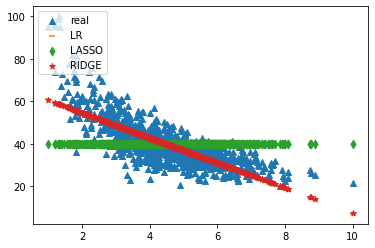

In [ ]:
#Visuaización de resultados
plt.scatter(X, np.ravel(y), marker='^', label='real')  

plt.scatter(X, np.ravel(yhat0), marker='_', label='LR')  
plt.scatter(X, np.ravel(yhat1), marker='d', label='LASSO')  
plt.scatter(X, np.ravel(yhat2), marker='*', label='RIDGE')

plt.legend(loc=2)
plt.show()

In [ ]:

#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1, random_state=1))
  nombres.append('LASSO')
  
  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=1, random_state=1))
  nombres.append('RIDGE')

  return modelos, nombres

In [ ]:

modelos, nombres = get_modelsRegs()
resultados = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, X, np.ravel(y), scoring='accuracy', cv=cv)
#round(y, 0)
  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

ValueError: ignored

In [ ]:
'''
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)'''

In [ ]:
'''
yhat_ridge = model.predict(X_test)

yhat_ridge'''

In [ ]:
'''
#Graficamos los datos

X_new=pd.DataFrame(np.linspace(0, 10, 100).reshape(100, 1), columns = ['Number of Units'])
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);'''

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

## LASSO

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model=lasso_model.fit(X_train , y_train)
yhat_lasso = lasso_model.predict(X_test)

In [ ]:
lasso_model.coef_, lasso_model.intercept_

(array([-5.42220651]), 64.30159616857074)

Modelo estimado con LASSO:

y^=-5.42X + 64.30

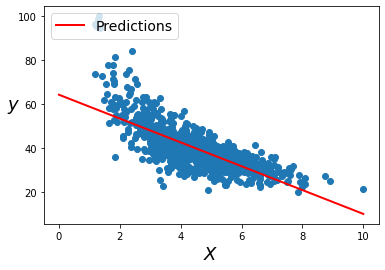

In [ ]:
# Construimos la mejor linea de ajuste
X_fit = np.linspace(0, 10, 100)
y_fit = lasso_model.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#Calculo de MAE, RSME y R2
print("LASSO")
print("*****"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_lasso)))
print('R2_score:',r2_score(y_test, yhat_lasso))
print("*****"*10)

LASSO
**************************************************
Error medio Absoluto (MAE): 5.092520710815617
Root Mean Squared Error: 7.2156139275269515
R2_score: 0.5998847335404536
**************************************************


In [ ]:
# Lasso con regresión logística
lassoLR = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1, random_state=1)
lassoLR = lassoLR.fit(X_train , np.ravel(y_train))
#yhat_lassoLR = lassoLR.predict(X_test)

ValueError: ignored

## RIDGE

In [ ]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_test, y_test) 
yhat_ridge= ridge_model.predict(X_test)

In [ ]:
ridge_model.coef_, ridge_model.intercept_

(array([-6.39499902]), 68.6829040555616)

Modelo estimado con RIDGE:

y^=-6.4X + 68.68

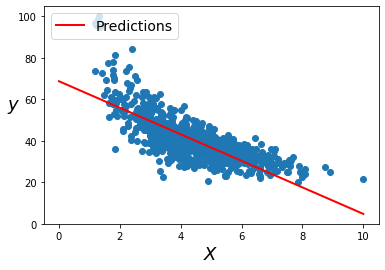

In [ ]:
# Construimos la mejor linea de ajuste
X_fit = np.linspace(0, 10, 100)
y_fit = ridge_model.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#Calculo de MAE, RSME y R2
print("RIDGE")
print("*****"*10)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_ridge)))
print('R2_score:',r2_score(y_test, yhat_ridge))
print("*****"*10)

RIDGE
**************************************************
Error medio Absoluto (MAE): 4.976244062163776
Root Mean Squared Error: 7.086142159554235
R2_score: 0.6141146710001248
**************************************************


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Numero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí